<>:21: SyntaxWarning: invalid escape sequence '\$'
<>:21: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-4183916274.py:21: SyntaxWarning: invalid escape sequence '\$'
  df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)


Saving Chocolate_Sales.csv to Chocolate_Sales (3).csv
Preview:


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184



Dataset shape: (3282, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB

Statistics:


,Amount,Boxes Shipped
count,3282.000000,3282.000000
mean,6030.338775,164.666971
std,4393.980200,124.024736
min,7.000000,1.000000
25%,2521.495000,71.000000
50%,5225.500000,137.000000
75%,8556.842500,232.000000
max,26170.950000,778.000000



Missing values:
Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


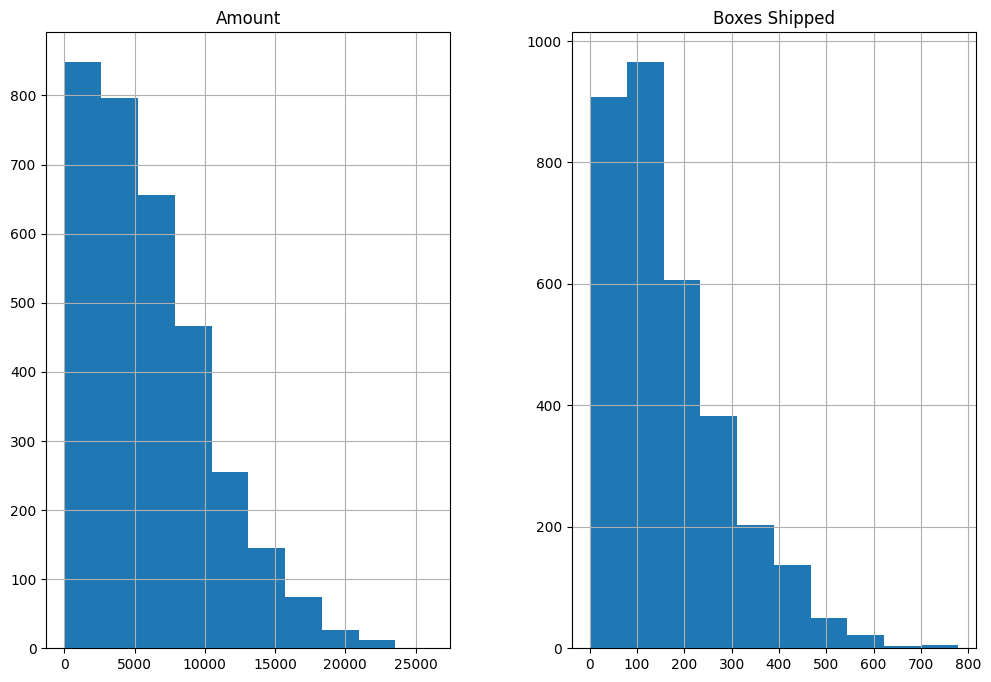

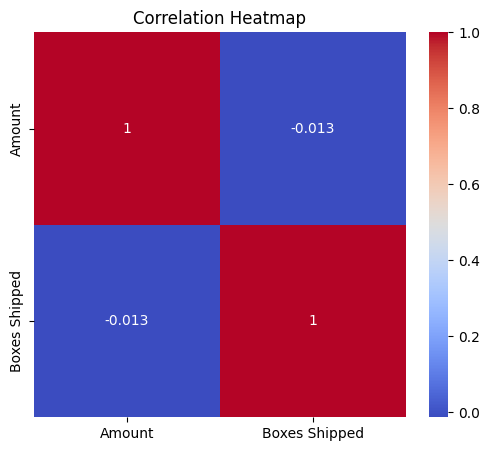

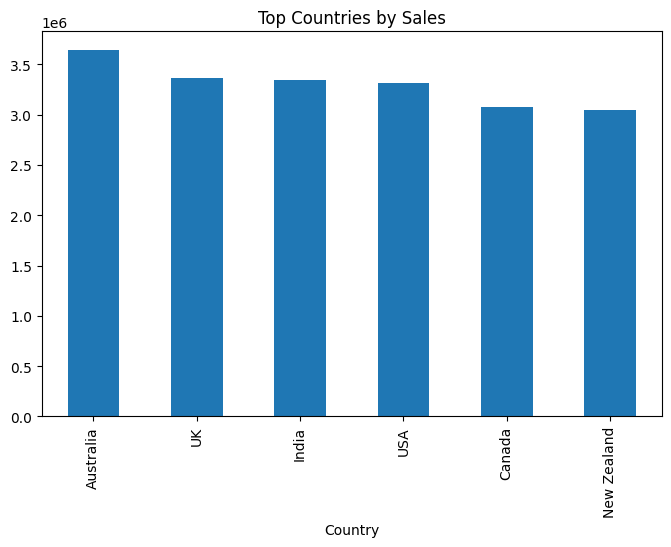

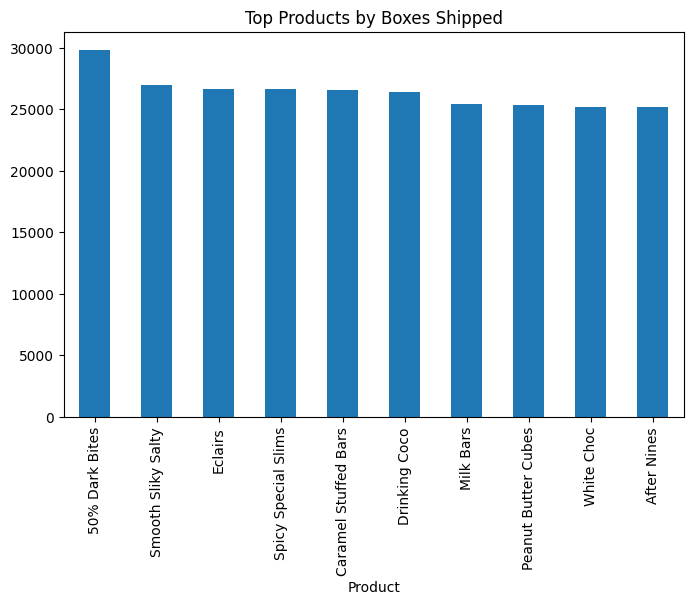

In [15]:
# Lab 3 - Professional EDA (Fixed for your dataset)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload dataset
from google.colab import files
files.upload()

# Load data
df = pd.read_csv("Chocolate_Sales.csv")

print("Preview:")
display(df.head())

print("\nDataset shape:", df.shape)
df.info()

# Convert Amount to numeric
df["Amount"] = df["Amount"].replace('[\$,]', '', regex=True).astype(float)

print("\nStatistics:")
display(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

# Histogram
df.hist(figsize=(12,8))
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[["Amount","Boxes Shipped"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Top countries by sales
df.groupby("Country")["Amount"].sum().sort_values(ascending=False).head(10)\
.plot(kind="bar", figsize=(8,5))
plt.title("Top Countries by Sales")
plt.show()

# Top products shipped
df.groupby("Product")["Boxes Shipped"].sum().sort_values(ascending=False).head(10)\
.plot(kind="bar", figsize=(8,5))
plt.title("Top Products by Boxes Shipped")
plt.show()
